In [31]:
import utils as ut
from prep_adult_data import *
from sklearn import svm
import matplotlib.pyplot as plt

In [10]:
def get_accuracy(y, y_predicted):
    correct_answers = (y_predicted == y).astype(int) # will have 1 when the prediction and the actual label match
    accuracy = float(sum(correct_answers)) / float(len(y))
    return accuracy

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [42]:
def test_data(data_size):
    X, y, x_control = load_adult_data(data_size)
    ut.compute_p_rule(x_control["sex"], y)
    
    train_fold_size = 0.7
    x_train, y_train, x_control_train, x_test, y_test, x_control_test = \
                                    ut.split_into_train_test(X, y, x_control, train_fold_size)
    ut.compute_p_rule(x_control_train["sex"], y_train)
    
    svc = svm.SVC(kernel='rbf')
    svc.fit(x_train, y_train)
    
    y_train_predicted = svc.predict(x_train)
    print("train predictions: ", y_train_predicted)
    train_accuracy = get_accuracy(y_train, y_train_predicted)
    print("training accuracy: ", train_accuracy)
    print("p-rule training: ", ut.compute_p_rule(x_control_train["sex"], y_train))
    
    y_test_predicted = svc.predict(x_test)
    print("test predictions: ", y_test_predicted)
    test_accuracy = get_accuracy(y_test, y_test_predicted)
    print("test accuracy: ", test_accuracy)
    print("p-rule testing: ", ut.compute_p_rule(x_control_test["sex"], y_test))
    return train_accuracy, test_accuracy

In [48]:
data_sizes = np.linspace(start=10000 , stop= 42000, num= 10)

In [44]:
train_accuracies = []
test_accuracies = []

In [45]:
for data_size in data_sizes:
    train_accuracy, test_accuracy = test_data(int(data_size))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print('--------------------------------------')
    print('--------------------------------------')

Looking for file 'adult.data' in the current directory...
File found in current directory..
Looking for file 'adult.test' in the current directory...
File found in current directory..
Loading only 10000 examples from the data
Total data points: 10000
# non-protected examples: 6729
# protected examples: 3271
Non-protected in positive class: 2148 (32%)
Protected in positive class: 376 (11%)
P-rule is: 36%
Total data points: 7000
# non-protected examples: 4726
# protected examples: 2274
Non-protected in positive class: 1517 (32%)
Protected in positive class: 284 (12%)
P-rule is: 39%
train predictions:  [-1. -1. -1. ... -1. -1. -1.]
training accuracy:  0.7914285714285715
Total data points: 7000
# non-protected examples: 4726
# protected examples: 2274
Non-protected in positive class: 1517 (32%)
Protected in positive class: 284 (12%)
P-rule is: 39%
p-rule training:  38.907740999252674
test predictions:  [-1. -1. -1. ... -1. -1. -1.]
test accuracy:  0.7933333333333333
Total data points: 3000

train predictions:  [-1. -1. -1. ... -1.  1. -1.]
training accuracy:  0.7969270049696804
Total data points: 21933
# non-protected examples: 14762
# protected examples: 7171
Non-protected in positive class: 4640 (31%)
Protected in positive class: 780 (11%)
P-rule is: 35%
p-rule training:  34.60525872888407
test predictions:  [ 1. -1. -1. ... -1. -1. -1.]
test accuracy:  0.8019148936170213
Total data points: 9400
# non-protected examples: 6295
# protected examples: 3105
Non-protected in positive class: 1930 (31%)
Protected in positive class: 345 (11%)
P-rule is: 36%
p-rule testing:  36.24064478986759
--------------------------------------
--------------------------------------
Looking for file 'adult.data' in the current directory...
File found in current directory..
Looking for file 'adult.test' in the current directory...
File found in current directory..
Loading only 34888 examples from the data
Total data points: 34888
# non-protected examples: 23505
# protected examples: 11383
Non-p

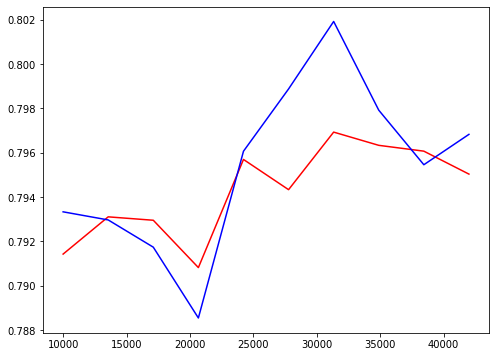

In [51]:
plt.figure(figsize=(8,6))
plt.plot(data_sizes.astype(int), train_accuracies, 'r-', data_sizes.astype(int), test_accuracies, 'b-')

In [52]:
plt.savefig('simpleSVM.png')

<Figure size 432x288 with 0 Axes>